In [ ]:
!pip install fastai --upgrade

     |████████████████████████████████| 358kB 5.5MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [ ]:
from fastai.vision.all import *

In [ ]:
path = untar_data(URLs.CAMVID_TINY)

In [ ]:
!dir {path}

codes.txt  images  labels


In [ ]:
!cat {path}/codes.txt

Animal
Archway
Bicyclist
Bridge
Building
Car
CartLuggagePram
Child
Column_Pole
Fence
LaneMkgsDriv
LaneMkgsNonDriv
Misc_Text
MotorcycleScooter
OtherMoving
ParkingBlock
Pedestrian
Road
RoadShoulder
Sidewalk
SignSymbol
Sky
SUVPickupTruck
TrafficCone
TrafficLight
Train
Tree
Truck_Bus
Tunnel
VegetationMisc
Void
Wall


In [ ]:
! ls {path}/labels

0001TP_006750_P.png  0016E5_01500_P.png  0016E5_08550_P.png
0001TP_006840_P.png  0016E5_01920_P.png  Seq05VD_f00000_P.png
0001TP_007500_P.png  0016E5_02250_P.png  Seq05VD_f00090_P.png
0001TP_007860_P.png  0016E5_05190_P.png  Seq05VD_f00210_P.png
0001TP_008070_P.png  0016E5_05310_P.png  Seq05VD_f00420_P.png
0001TP_008160_P.png  0016E5_05730_P.png  Seq05VD_f00480_P.png
0001TP_008400_P.png  0016E5_05940_P.png  Seq05VD_f00810_P.png
0001TP_008580_P.png  0016E5_06090_P.png  Seq05VD_f00990_P.png
0001TP_008670_P.png  0016E5_06240_P.png  Seq05VD_f01080_P.png
0001TP_008700_P.png  0016E5_06300_P.png  Seq05VD_f01260_P.png
0001TP_008760_P.png  0016E5_06570_P.png  Seq05VD_f01320_P.png
0001TP_008940_P.png  0016E5_06810_P.png  Seq05VD_f01440_P.png
0001TP_009000_P.png  0016E5_06870_P.png  Seq05VD_f01830_P.png
0001TP_009150_P.png  0016E5_06990_P.png  Seq05VD_f01890_P.png
0001TP_009360_P.png  0016E5_07290_P.png  Seq05VD_f01950_P.png
0001TP_009840_P.png  0016E5_07973_P.png  Seq05VD_f02070_P.png
0001TP_009

In [ ]:
dls = SegmentationDataLoaders.from_label_func(
    path, fnames=get_image_files(path/"images"), 
    label_func = lambda o: path/"labels"/f'{o.stem}_P{o.suffix}', 
    codes = np.loadtxt(path/"codes.txt", dtype=str))


In [ ]:
learn = unet_learner(dls, resnet34)
learn.fine_tune(24)

epoch,train_loss,valid_loss,time
0,3.565570,3.353110,00:01


epoch,train_loss,valid_loss,time
0,3.400381,2.978833,00:01
1,3.249495,2.926491,00:01
2,3.117074,2.606693,00:01
3,2.983955,2.477434,00:01
4,2.888076,2.811357,00:01
5,2.973673,2.907998,00:01
6,2.928051,2.714471,00:01
7,2.873183,2.583726,00:01
8,2.808727,2.273379,00:01
9,2.747731,2.130372,00:01


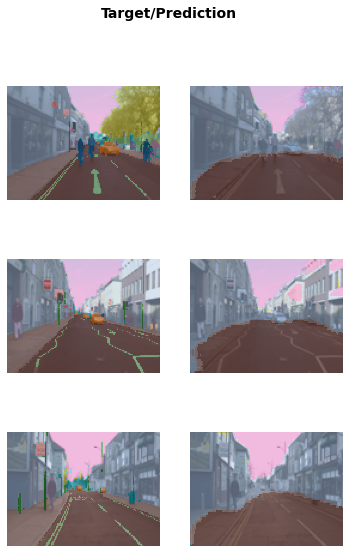

In [ ]:
learn.show_results()

In [21]:
from ipywidgets import widgets

uploader= widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [41]:
img = PILImage.create(uploader.data[0])
predicted_img,predict2,predict3 = learn.predict(img)

# not able to get the output working

# for i in predicted_img:
#   print(i)


In [42]:
#predict3.to_thumb(192)

AttributeError: ignored

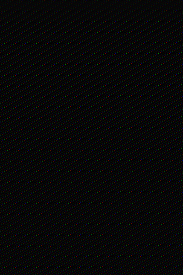

In [44]:
import torch as t
from torchvision.transforms import ToPILImage
from IPython.display import Image
to_img = ToPILImage()

# display tensor

to_img(predict3)

# display imagefile
#Image('/path/to/my.png')